# Marketing Campaign Analysis and Sales Forecasting
 Author:- Sanjeev Singh
 

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [63]:
# Load the dataset
data = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset to ensure it loaded correctly
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Sales : in thousands of units 

TV, radio, and newspaper budgets, in thousands of dollars

In [45]:
# Get summary statistics of the dataset
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


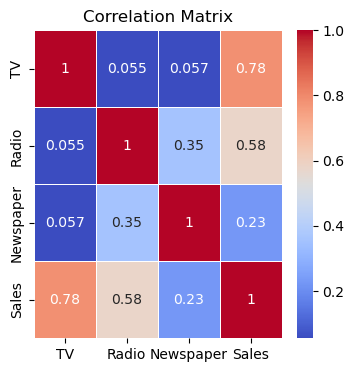

In [46]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


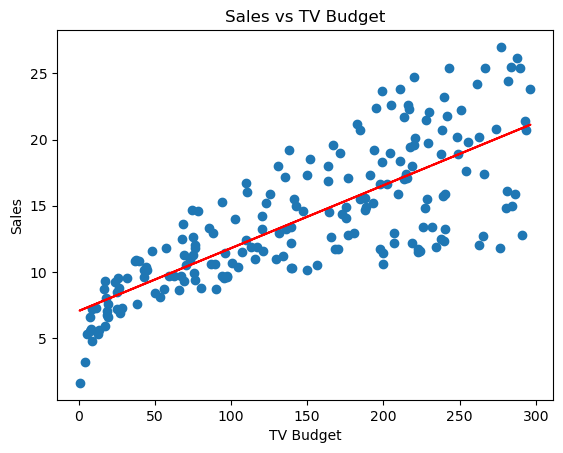

In [48]:
X = data['TV'].values.reshape(-1,1) 
y = data['Sales']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('Sales vs TV Budget')
plt.show()

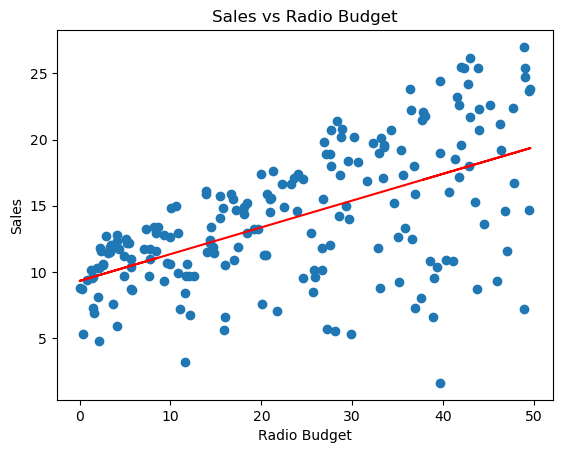

In [49]:
# Sales vs Radio
X = data['Radio'].values.reshape(-1,1)
y = data['Sales'] 
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.title('Sales vs Radio Budget')
plt.show()

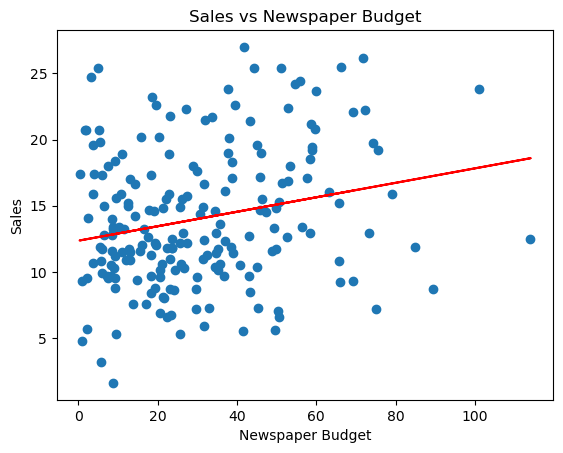

In [50]:
# Sales vs Newspaper
X = data['Newspaper'].values.reshape(-1,1)  
y = data['Sales']
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Newspaper Budget')  
plt.ylabel('Sales')
plt.title('Sales vs Newspaper Budget')
plt.show()

In [70]:
# Split the data into features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [72]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


Mean Absolute Error: 1.46
Mean Squared Error: 3.17
R-squared (R^2): 0.90


In [73]:
import statsmodels.api as sm

# Add a constant term to the features (intercept term)
X = sm.add_constant(X)

# Create and fit the OLS model
model_ols = sm.OLS(y, X).fit()

# Display the summary of the model to view coefficients, p-values, and more
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        15:33:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [76]:
# Drop the 'Newspaper' variable from the dataset
data = data.drop('Newspaper', axis=1)

# Recreate X and y after dropping the 'Newspaper' variable
X = data[['TV', 'Radio']]
y = data['Sales']


In [77]:
# Add a constant term to the features (intercept term)
X = sm.add_constant(X)

# Create and fit the OLS model with the updated data
model_ols = sm.OLS(y, X).fit()

# Display the summary of the updated model
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           4.83e-98
Time:                        15:44:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [58]:
# Create feature matrix (X) and target variable (y)
X = data[['TV', 'Radio']]
y = data['Sales']

# Split the data into a training set and a testing set (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Create a linear regression model
model = LinearRegression()
model

LinearRegression()

In [60]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([16.35747252, 20.86299397, 21.52505848, 10.58719845, 22.22459614,
       13.06070499, 21.09564403,  7.47641062, 13.62409831, 15.15019438,
        9.12761147,  6.62878923, 14.16531076,  8.97073929,  9.66825463,
       12.12821691,  8.71252199, 16.30911498, 10.26684186, 18.89010391,
       19.4519532 , 13.03925601, 12.41182149, 21.20994137,  7.88771365,
        5.80255394, 20.7764401 , 12.02358305,  9.1784369 ,  8.59012258,
       12.46070487, 10.03213267, 21.34367738, 12.11632301, 18.23376459,
       20.22242395, 14.14999367, 20.78067544, 11.07322103,  4.56335118])

In [62]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error: 1.44
Mean Squared Error: 3.14
R-squared (R^2): 0.90


In [78]:
# Define new data with values for 'TV' and 'Radio'
new_data = pd.DataFrame({'TV': [237], 'Radio': [110]})

# Add a constant term to the new data
new_data['const'] = 1  # Adding a constant term with a value of 1

# Reorder the columns to match the order expected by the model
new_data = new_data[['const', 'TV', 'Radio']]

# Use the updated OLS model to make predictions
predictions = model_ols.predict(new_data)

# Print the predictions
print("Predicted Sales after dropping 'Newspaper':", predictions[0])


Predicted Sales after dropping 'Newspaper': 34.44435601959418


In [67]:
# Define new data with values for 'TV' and 'Radio'
new_data = pd.DataFrame({'TV': [230], 'Radio': [37]})

# Add a constant term to the new data
new_data['const'] = 1  # Adding a constant term with a value of 1

# Reorder the columns to match the order expected by the model
new_data = new_data[['const', 'TV', 'Radio']]

# Use the updated OLS model to make predictions
predictions = model_ols.predict(new_data)

# Print the predictions
print("Predicted Sales after dropping 'Newspaper':", predictions[0])

Predicted Sales after dropping 'Newspaper': 20.400493770604076


In [75]:
# Define new data with values for 'TV' and 'Radio'
new_data = pd.DataFrame({'TV': [230], 'Radio': [37],'Newspaper':[69]})

# Add a constant term to the new data
new_data['const'] = 1  # Adding a constant term with a value of 1

# Reorder the columns to match the order expected by the model
new_data = new_data[['const', 'TV', 'Radio','Newspaper']]

# Use the updated OLS model to make predictions
predictions = model_ols.predict(new_data)

# Print the predictions
print("Predicted Sales before dropping 'Newspaper':", predictions[0])

Predicted Sales before dropping 'Newspaper': 20.368781430243565
